<a href="https://colab.research.google.com/github/Nihala-RI/Machine-Learning/blob/main/Customer_Churn_Analysis_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df['Geography']=df['Geography'].astype('category')
df['Gender']=df['Gender'].astype('category')

In [ ]:
print(df['Geography'].unique())
df['Gender'].unique()

['France', 'Spain', 'Germany']
Categories (3, object): ['France', 'Germany', 'Spain']


['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [ ]:
le=LabelEncoder()

In [ ]:
df['Geography']=le.fit_transform(df['Geography'])

In [ ]:
df=pd.get_dummies(df,columns=['Gender'])

In [ ]:
print(df['Geography'].unique())

[0 2 1]


In [ ]:
df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5190 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4358 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4274 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4255 - accura

In [ ]:
ann.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8595


[0.3383233845233917, 0.859499990940094]

In [ ]:
y_pred=ann.predict(x_test)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.25088423],
       [0.32784775],
       [0.21568474],
       ...,
       [0.08958087],
       [0.09541394],
       [0.25983003]], dtype=float32)

In [ ]:
y_predictions=[]
for i in y_pred:
  if i>0.5:
    y_predictions.append(1)
  else:
    y_predictions.append(0)
print(np.array(y_predictions).reshape(-1,1))

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
y_pred=np.array(y_predictions)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.Series(y_pred)

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Length: 2000, dtype: int64

In [ ]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [ ]:
np.array(y_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_test.values

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_test.ravel()

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_test.ravel().reshape(-1,1)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
pd.DataFrame({'Actual Class':y_test,'Predicted Class':y_pred})

,Actual Class,Predicted Class
9394,0,0
898,1,0
2398,0,0
5906,0,0
2343,0,0
...,...,...
1037,0,0
2899,0,0
9549,0,0
2740,0,0


In [ ]:
newdata=pd.DataFrame({'CreditScore':608,	'Geography':0	,'Age':40,	'Tenure':3	,'Balance':60000	,'NumOfProducts':2,	'HasCrCard':1	,'IsActiveMember':1	,'EstimatedSalary':50000,	'Gender_Female':0	,'Gender_Male':1},index=[[1]])

In [ ]:
pred=ann.predict(newdata)

1/1 [==============================] - 0s 22ms/step


In [ ]:
for i in pred:
  if i>0.5:
    print('Yes, Customer exited')
  else:
    print('Customer remains')

Customer remains


Text(183.22222222222223, 0.5, 'True_number')

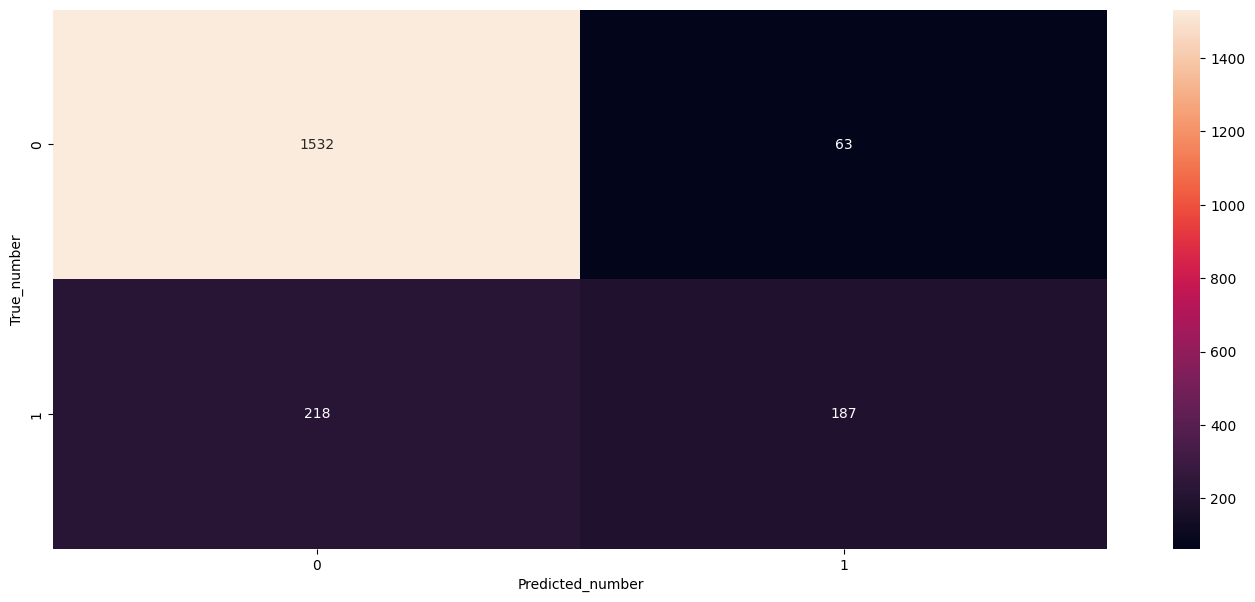

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(17,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.46      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
def plot_roc_curve(y_test,y_pred):
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  fpr,tpr,thresholds=roc_curve(y_test,y_pred)
  plt.plot(ns_fpr,ns_tpr,linestyle='--', label='No skill')
  plt.plot(fpr,tpr,marker='.', label='ANN')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()
  print(f"ANN:",{roc_auc_score(y_test,y_pred)})
  print(f"No Skill:",{roc_auc_score(y_test,ns_probs)})

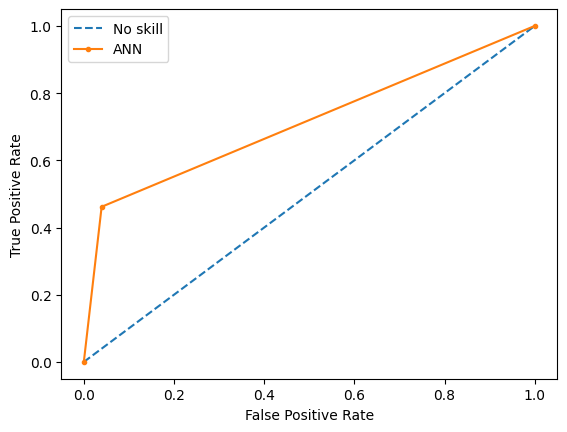

ANN: {0.7111149812299238}
No Skill: {0.5}


In [ ]:
plot_roc_curve(y_test,y_pred)